In [2]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os

import time

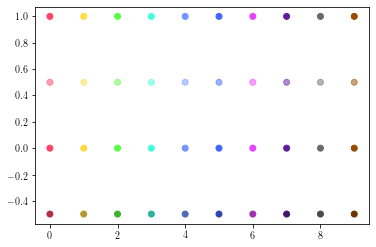

In [3]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
# Colorblind safe palettes
base = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#020202', '#abd9e9', '#74add1', '#4575b4']
#base = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac']
#base = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
# Rainbow palette
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#7395ff", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#964b00"]#np.array([cmap(i) for i in range(2,20)])
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
#base = [base[i] for i in [0,1,3]]
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

## Load results

In [4]:
directory_real = "sachs_experiments/real_dataset_dag:consensus/"
directory_gauss = "sachs_experiments/dataset_1658417439_runs:10_seed:42_tag:sachs_consensus_type:gauss_standardize:0_n:None/"
directory_drf = "sachs_experiments/dataset_1658417465_runs:10_seed:42_tag:sachs_consensus_type:drf_standardize:0_n:None/"

In [5]:
DIR_WANG="sachs_experiments/dataset_1659123588_sachs_wang_2017_normalized:False/"
DIR_WANG_NORM="sachs_experiments/dataset_1659123588_sachs_wang_2017_normalized:True/"
DIR_SACHS="sachs_experiments/dataset_1659123603_sachs_sachs_2005_normalized:False/"
DIR_SACHS_NORM="sachs_experiments/dataset_1659123603_sachs_sachs_2005_normalized:True/"
DIR_WANG_NORM_DRF="sachs_experiments/dataset_1659123932_runs:10_seed:42_tag:sachs_wang_normalized_type:drf_standardize:0_n:None/"
DIR_WANG_DRF="sachs_experiments/dataset_1659124323_runs:10_seed:42_tag:sachs_wang_type:drf_standardize:0_n:None/"
DIR_SACHS_DRF="sachs_experiments/dataset_1659124323_runs:10_seed:42_tag:sachs_2005_type:drf_standardize:0_n:None/"
DIR_SACHS_NORM_DRF="sachs_experiments/dataset_1659124353_runs:10_seed:42_tag:sachs_2005_normalized_type:drf_standardize:0_n:None/"

norm=False
dataset="sachs"
directory_real = DIR_SACHS
directory_drf = DIR_SACHS_DRF

In [6]:
norm=True
dataset="sachs"
directory_real = DIR_SACHS_NORM
directory_drf = DIR_SACHS_NORM_DRF

norm=False
dataset="wang"
directory_real = DIR_WANG
directory_drf = DIR_WANG_DRF

norm=True
dataset="wang"
directory_real = DIR_WANG_NORM
directory_drf = DIR_WANG_NORM_DRF

norm=False
dataset="taeb"
directory_real = "sachs_experiments/real_dataset_dag:consensus/"
directory_drf = "sachs_experiments/dataset_1658417465_runs:10_seed:42_tag:sachs_consensus_type:drf_standardize:0_n:None/"

In [7]:
def load_results(directory, method, lambdas_idx=2):
    args, results = utils.read_pickle(directory + utils.compiled_results_filename(method))
    ground_truth, metrics = utils.read_pickle(directory + "metrics_%s.pickle" % method)
    return args, results, ground_truth, metrics, args[lambdas_idx]

**GnIES**

In [8]:
gnies_args, gnies_results_real, _, gnies_metrics_real, gnies_lambdas = load_results(directory_real, 'gnies_fb')
#gnies_args, gnies_results, _, gnies_metrics_gauss, gnies_lambdas = load_results(directory_gauss, 'gnies_fb')
gnies_args, gnies_results_drf, _, gnies_metrics_drf, gnies_lambdas = load_results(directory_drf, 'gnies_fb')

gnies_x_real = np.nanmean(gnies_metrics_real[metrics.type_1_structc], axis=(0,3))
gnies_y_real = np.nanmean(gnies_metrics_real[metrics.type_2_structc], axis=(0,3))

#gnies_x_gauss = np.nanmean(gnies_metrics_gauss[metrics.type_1_structc], axis=(0,3))
#gnies_y_gauss = np.nanmean(gnies_metrics_gauss[metrics.type_2_structc], axis=(0,3))

gnies_x_drf = np.nanmean(gnies_metrics_drf[metrics.type_1_structc], axis=(0,3))
gnies_y_drf = np.nanmean(gnies_metrics_drf[metrics.type_2_structc], axis=(0,3))

(gnies_metrics_real[metrics.success_metric].mean()
 #,gnies_metrics_gauss[metrics.success_metric].mean()
 ,gnies_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0)

**UT-IGSP**

In [9]:
ut_igsp_args, ut_igsp_results_real, _, ut_igsp_metrics_real, ut_igsp_alphas_real = load_results(directory_real, 'ut_igsp_gauss',lambdas_idx=1)
#ut_igsp_args, ut_igsp_results, _, ut_igsp_metrics_gauss, ut_igsp_alphas_gauss = load_results(directory_gauss, 'ut_igsp',lambdas_idx=1)
ut_igsp_args, ut_igsp_results_drf, _, ut_igsp_metrics_drf, ut_igsp_alphas_drf = load_results(directory_drf, 'ut_igsp_gauss',lambdas_idx=1)

ut_igsp_x_real = np.nanmean(ut_igsp_metrics_real[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_y_real = np.nanmean(ut_igsp_metrics_real[metrics.type_2_structc], axis=(0,4))[:,0]

#ut_igsp_x_gauss = np.nanmean(ut_igsp_metrics_gauss[metrics.type_1_structc], axis=(0,4))[:,0]
#ut_igsp_y_gauss = np.nanmean(ut_igsp_metrics_gauss[metrics.type_2_structc], axis=(0,4))[:,0]

ut_igsp_x_drf = np.nanmean(ut_igsp_metrics_drf[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_y_drf = np.nanmean(ut_igsp_metrics_drf[metrics.type_2_structc], axis=(0,4))[:,0]

(ut_igsp_metrics_real[metrics.success_metric].mean()
# ,ut_igsp_metrics_gauss[metrics.success_metric].mean()
 ,ut_igsp_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0)

**UT-IGSP***

In [10]:
ut_igsp_hsic_args, ut_igsp_hsic_results_real, _, ut_igsp_hsic_metrics_real, ut_igsp_hsic_alphas_real = load_results(directory_real, 'ut_igsp_hsic',lambdas_idx=1)
#ut_igsp_hsic_args, ut_igsp_hsic_results, _, ut_igsp_hsic_metrics_gauss, ut_igsp_hsic_alphas_gauss = load_results(directory_gauss, 'ut_igsp_hsic',lambdas_idx=1)
ut_igsp_hsic_args, ut_igsp_hsic_results_drf, _, ut_igsp_hsic_metrics_drf, ut_igsp_hsic_alphas_drf = load_results(directory_drf, 'ut_igsp_hsic',lambdas_idx=1)

ut_igsp_hsic_x_real = np.nanmean(ut_igsp_hsic_metrics_real[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_hsic_y_real = np.nanmean(ut_igsp_hsic_metrics_real[metrics.type_2_structc], axis=(0,4))[:,0]

#ut_igsp_hsic_x_gauss = np.nanmean(ut_igsp_hsic_metrics_gauss[metrics.type_1_structc], axis=(0,4))[:,0]
#ut_igsp_hsic_y_gauss = np.nanmean(ut_igsp_hsic_metrics_gauss[metrics.type_2_structc], axis=(0,4))[:,0]

ut_igsp_hsic_x_drf = np.nanmean(ut_igsp_hsic_metrics_drf[metrics.type_1_structc], axis=(0,4))[:,0]
ut_igsp_hsic_y_drf = np.nanmean(ut_igsp_hsic_metrics_drf[metrics.type_2_structc], axis=(0,4))[:,0]

(ut_igsp_hsic_metrics_real[metrics.success_metric].mean()
# ,ut_igsp_hsic_metrics_gauss[metrics.success_metric].mean()
 ,ut_igsp_hsic_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0)

**GES**

In [11]:
ges_args, ges_results_real, _, ges_metrics_real, ges_lambdas = load_results(directory_real, 'ges')
#ges_args, ges_results, _, ges_metrics_gauss, ges_lambdas = load_results(directory_gauss, 'ges')
ges_args, ges_results_drf, _, ges_metrics_drf, ges_lambdas = load_results(directory_drf, 'ges')

ges_x_real = np.nanmean(ges_metrics_real[metrics.type_1_structc], axis=(0,3))
ges_y_real = np.nanmean(ges_metrics_real[metrics.type_2_structc], axis=(0,3))

#ges_x_gauss = np.nanmean(ges_metrics_gauss[metrics.type_1_structc], axis=(0,3))
#ges_y_gauss = np.nanmean(ges_metrics_gauss[metrics.type_2_structc], axis=(0,3))

ges_x_drf = np.nanmean(ges_metrics_drf[metrics.type_1_structc], axis=(0,3))
ges_y_drf = np.nanmean(ges_metrics_drf[metrics.type_2_structc], axis=(0,3))

(ges_metrics_real[metrics.success_metric].mean()
# ,ges_metrics_gauss[metrics.success_metric].mean()
 ,ges_metrics_drf[metrics.success_metric].mean())

(1.0, 1.0)

In [12]:
ges_x_real

array([[0.91489362],
       [0.80555556],
       [0.82352941],
       [0.81818182],
       [0.83870968]])

## Figures

### Figure 1: Class recovery trajectories

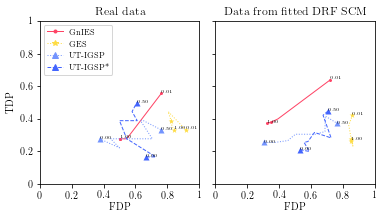

In [13]:
plot_gauss = False
text = True
textsize = 5
lineopts = {'linewidth': 1}
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
marker = {'gnies': '.',
          'gnies_rank': '.',
          'ges': '*',
          'ut_igsp': '^',
          'ut_igsp_hsic': '^',
          'jci_pc': 's',           
}
style = {'gnies': '-',
         'gnies_rank': ':',
         'ges': ':',
         'ut_igsp': ':',
         'ut_igsp_hsic': '--',
         'jci_pc': ':',
           
}
color = {'gnies': colors[0],
         'gnies_rank': colorsa[0],
         'ges': colors[1],
         'ut_igsp': colors[4],
         'ut_igsp_hsic': colors[5],
         'jci_pc': colors[2],
         
}

print_names = {'gnies': 'GnIES',
               #'gnies_rank': 'GnIES-rank',
               'ges': 'GES',
               'ut_igsp': 'UT-IGSP',
               'ut_igsp_hsic': 'UT-IGSP*',
               #'jci_pc': 'JCI-PC',         
}

def set_ax(ax, yticks=True):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('FDP')
    ax.set_ylabel('TDP') if yticks else None
    ax.set_yticks(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks) if yticks else ax.set_yticklabels([])

def plot_metric(ax, values_x, values_y, lambdas, method, points, text):
    values_y = 1 - values_y
    ax.plot(values_x, values_y, color=color[method], linestyle=style[method], **lineopts)
    for j, l in enumerate(lambdas):
        #ax.scatter(values_x[j], values_y[j], color=color[method], marker=".", linewidth=0)
        if j==0 and text[0] is not None:
            ax.text(values_x[j], values_y[j], "$%0.2f$" % l, fontsize=textsize)
        if l==lambdas[-1] and text[1] is not None:
            ax.text(values_x[j], values_y[j], "$%0.2f$" % l, fontsize=textsize)
        if j in points:
            ax.scatter(values_x[j], values_y[j], color=color[method], marker=marker[method], linewidth=0)

cols = 3 if plot_gauss else 2
gs = gridspec.GridSpec(1, cols, wspace=0.10, hspace=0.2)
plt.figure(figsize=(3*cols,3))
ax = plt.gca()

###########################
# PLOT REAL DATA
plt.subplot(gs[0])
ax = plt.gca()    
ax0 = ax
# Plot GnIES
plot_metric(ax, gnies_x_real, gnies_y_real, gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], ["%0.2f", "%d"])      
# Plot UT-IGSP
plot_metric(ax, ut_igsp_x_real, ut_igsp_y_real, ut_igsp_alphas_real, 'ut_igsp', [0,len(ut_igsp_alphas_real)-1], ["%0.2f", "%d"])
# Plot UT-IGSP*
plot_metric(ax, ut_igsp_hsic_x_real, ut_igsp_hsic_y_real, ut_igsp_hsic_alphas_real, 'ut_igsp_hsic', [0,len(ut_igsp_hsic_alphas_real)-1], ["%0.2f", "%d"])
# Plot GES
plot_metric(ax, ges_x_real, ges_y_real, ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], ["%0.2f", "%d"])    
set_ax(ax, yticks=True)
ax.set_title("Real data")

###########################
# PLOT GAUSSIAN DATA
if plot_gauss:
    plt.subplot(gs[1])
    ax = plt.gca()    
    # Plot GnIES
    plot_metric(ax, gnies_x_gauss, gnies_y_gauss, gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], ["%0.2f", "%d"])      
    # Plot UT-IGSP
    plot_metric(ax, ut_igsp_x_gauss, ut_igsp_y_gauss, ut_igsp_alphas_gauss, 'ut_igsp', [0,len(ut_igsp_alphas_gauss)-1], ["%0.2f", "%d"])
    # Plot UT-IGSP*
    plot_metric(ax, ut_igsp_hsic_x_gauss, ut_igsp_hsic_y_gauss, ut_igsp_hsic_alphas_gauss, 'ut_igsp_hsic', [0,len(ut_igsp_hsic_alphas_gauss)-1], ["%0.2f", "%d"])
    # Plot GES
    plot_metric(ax, ges_x_gauss, ges_y_gauss, ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], ["%0.2f", "%d"])    
    set_ax(ax, yticks=False)
    ax.set_title("Data from fitted Gaussian SCM")

###########################
# PLOT DRF DATA
plt.subplot(gs[2 if plot_gauss else 1])
ax = plt.gca()    
# Plot GnIES
plot_metric(ax, gnies_x_drf, gnies_y_drf, gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], ["%0.2f", "%d"])      
# Plot UT-IGSP
plot_metric(ax, ut_igsp_x_drf, ut_igsp_y_drf, ut_igsp_alphas_drf, 'ut_igsp', [0,len(ut_igsp_alphas_drf)-1], ["%0.2f", "%d"])
# Plot UT-IGSP*
plot_metric(ax, ut_igsp_hsic_x_drf, ut_igsp_hsic_y_drf, ut_igsp_hsic_alphas_drf, 'ut_igsp_hsic', [0,len(ut_igsp_hsic_alphas_drf)-1], ["%0.2f", "%d"])
# Plot GES
plot_metric(ax, ges_x_drf, ges_y_drf, ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], ["%0.2f", "%d"])    
set_ax(ax, yticks=False)
ax.set_title("Data from fitted DRF SCM")

# Build legend
method_entries = [Line2D([0], [0],
                         linewidth=1,
                         linestyle=style[method],
                         marker=marker[method],
                         color=color[method]) for method in print_names.keys()]
method_str = list(print_names.values())
ax0.legend(method_entries, #+ sample_size_entries
          method_str, # + sample_size_str
          prop={'size':8},
          loc='upper left',
        ncol=1)

filename = 'figures/figure_sachs_%s_norm:%s.pdf' % (dataset, norm)
plt.savefig(filename, bbox_inches='tight')

## Analysis of the GnIES and UT-IGSP estimates

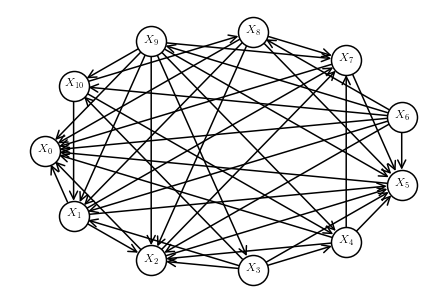

True


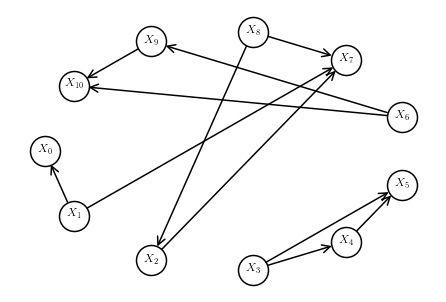

True


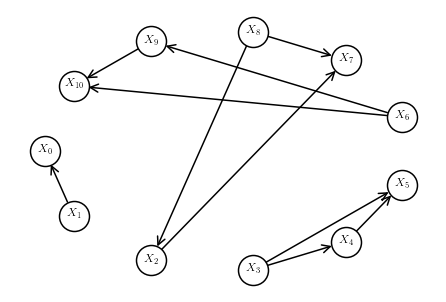

True


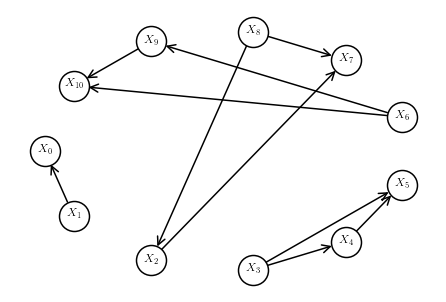

True


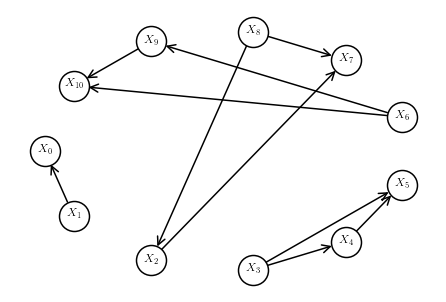

True


array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       

In [19]:
gnies_estimates = gnies_results_real['estimates'][0,:,0,0]
for estimate in gnies_estimates:
    sempler.utils.plot_graph(estimate)
    print(sempler.utils.is_dag(estimate))
np.unique(np.array([a for a in gnies_estimates]), axis=0)

In [23]:
gnies_results_drf['estimates'].shape

(1, 5, 1, 10)

In [30]:
for r in range(10):
    for estimate in gnies_results_drf['estimates'][0,:,0,r]:    
        assert sempler.utils.is_dag(estimate)

In [34]:
def edge_frequency(dags):
    return np.sum(dags, axis=0) / len(dags)

#### GnIES

**Estimates from real data**

0.01


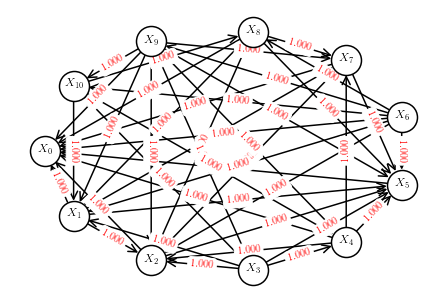

0.25


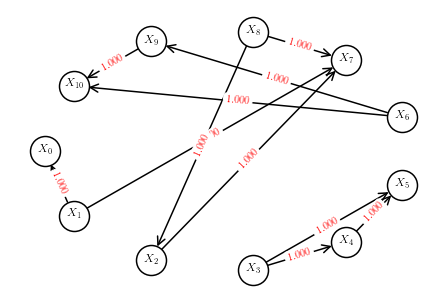

0.5


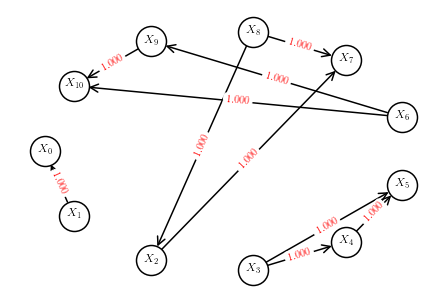

0.75


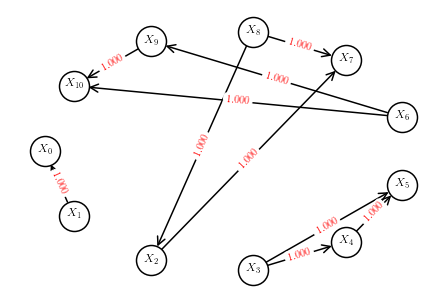

1.0


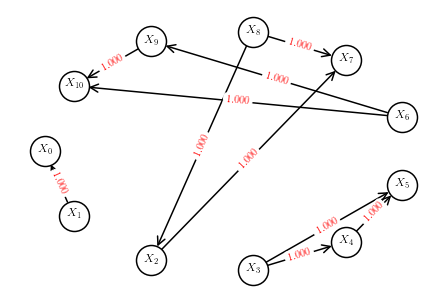

In [41]:
for i,lambda_estimates in enumerate(gnies_results_real['estimates'][0,:,0,:]):
    print(gnies_lambdas[i])
    lambda_estimates = np.array([A for A in lambda_estimates])
    sempler.utils.plot_graph(edge_frequency(lambda_estimates), weights=True)

**Estimates from DRF data**

0.01


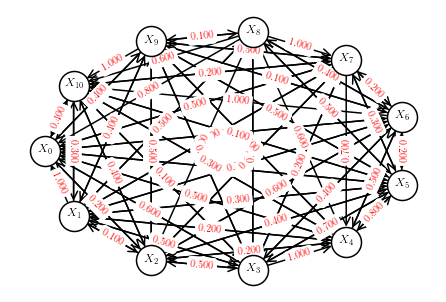

0.25


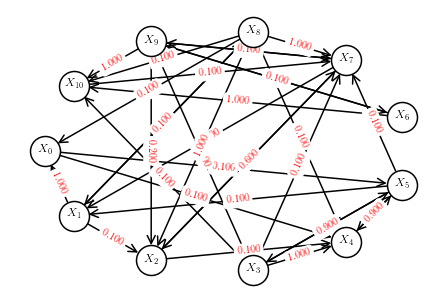

0.5


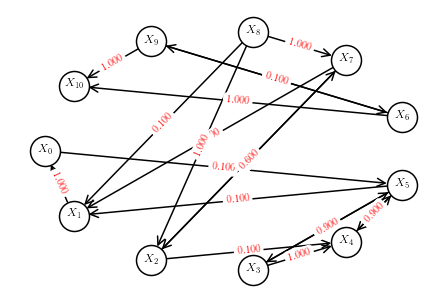

0.75


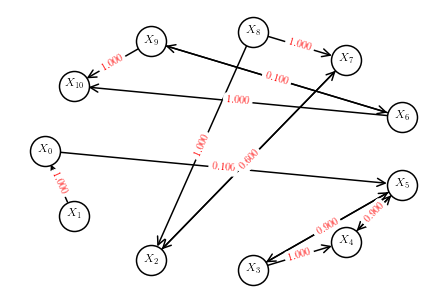

1.0


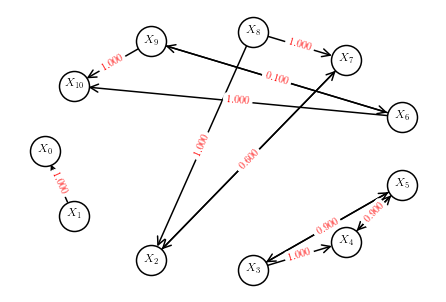

In [40]:
for i,lambda_estimates in enumerate(gnies_results_drf['estimates'][0,:,0,:]):
    print(gnies_lambdas[i])
    lambda_estimates = np.array([A for A in lambda_estimates])
    sempler.utils.plot_graph(edge_frequency(lambda_estimates), weights=True)

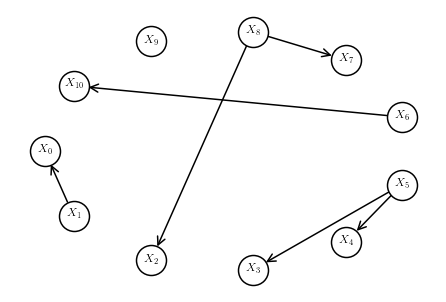

True


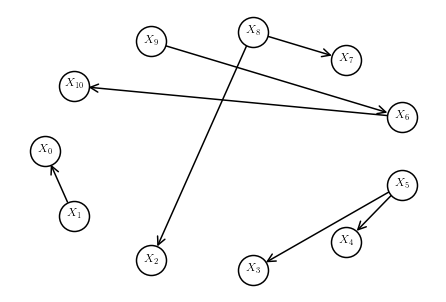

True


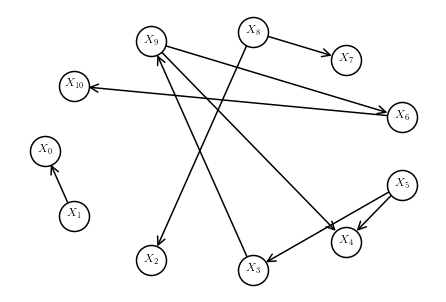

True


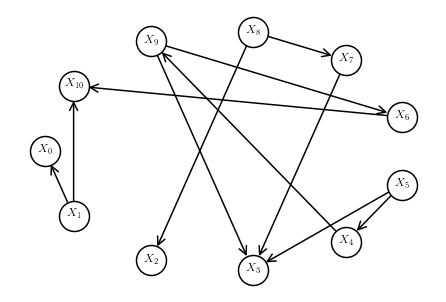

True


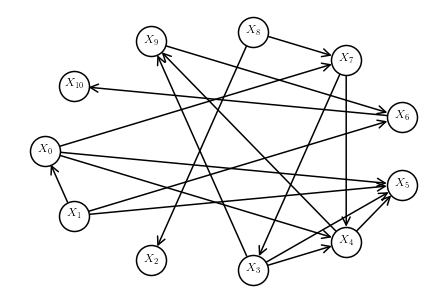

True


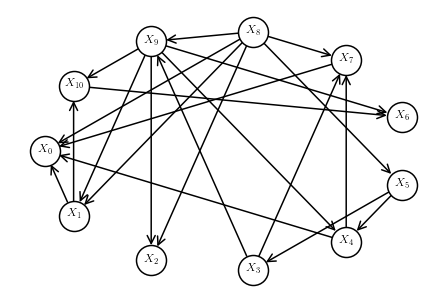

True


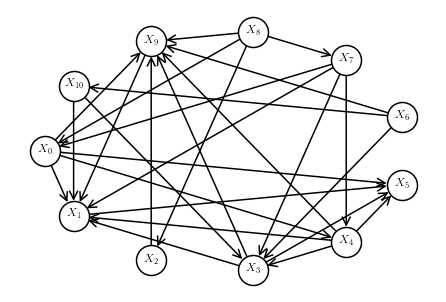

True


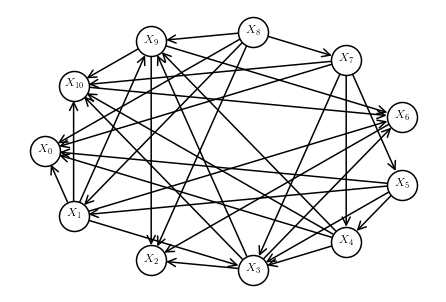

True


In [28]:
for estimate in ut_igsp_results_drf['estimates'][0,:,0,0,0]:
    sempler.utils.plot_graph(estimate)
    print(sempler.utils.is_dag(estimate))

In [27]:
ut_igsp_results_real['estimates'].shape

(1, 8, 1, 1, 1)

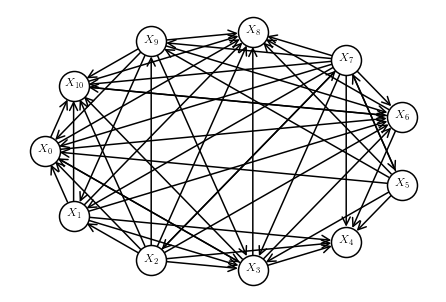

False


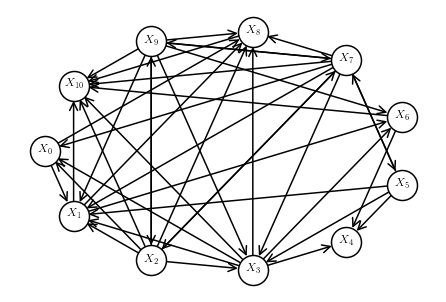

False


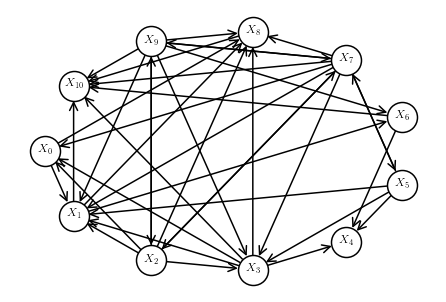

False


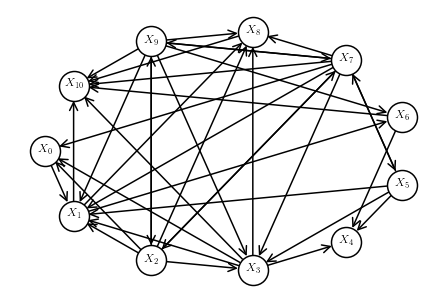

False


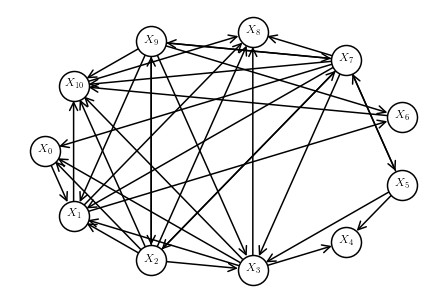

False


In [30]:
for estimate in ges_results_real['estimates'][0,:,0,0]:
    sempler.utils.plot_graph(estimate)
    print(sempler.utils.is_dag(estimate))

## Justification of non-linearity, non-gaussianity

In [1]:
import sachs
from sklearn.neighbors import KernelDensity

In [ ]:
def plot_density(ax, data, n=1000):
    data = np.atleast_2d(data).T
    print(data.shape)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)
    X_plot = np.atleast_2d(np.linspace(data.min(), data.max(), n)).T
    print(X_plot.shape)
    print(data.min(), data.max())
    log_dens = kde.score_samples(X_plot)
    #ax.scatter(data)
    ax.plot(X_plot,np.exp(log_dens))

In [ ]:
def plot_marginals(datas, labels, colors, edgecolors, hatches, filename=None):
    node2idx = dict((n,i) for i,n in enumerate(sachs.node_names))    
    gs = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)
    for name,i in node2idx.items():
        plt.subplot(gs[i+1])        
        ax = plt.gca()
        if i==0:
            ax0 = ax
        ax.text(0.9,0.9,"%s" % name, transform=ax.transAxes, fontsize=12, ha='right', va='top')
        hist = ax.hist([data[:,i] for data in datas])    
        for i,bars in enumerate(hist[2]):
            for j,bar in enumerate(bars):
                bar.set(fill=True, hatch=hatches[i], linewidth=1, facecolor=colors[i], edgecolor=edgecolors[i])
                bar.set(label=labels[i]) if j==0 else None    
    ax0.legend(loc=(-1.2,0.5), prop={'size': 12})

In [ ]:
real_data = sachs.load_data(normalize=False)
gauss_data = utils.load_bin(directory_gauss + "test_case_n:-1_g:0_r:0")
drf_data = utils.load_bin(directory_drf + "test_case_n:-1_g:0_r:0")

In [ ]:
node2idx = dict((n,i) for i,n in enumerate(sachs.node_names))
node2idx['PKA'], node2idx['PKC']

In [ ]:
labels = ['Real data', 'Data from\nfitted DRF SCM']
plt.figure(figsize=(9,12))
gs = plot_marginals([real_data[0], drf_data[0]], labels=labels, colors=colorsa[[0,4]], edgecolors=colorsb[[0,4]], hatches=['...', '////'])
plt.savefig("figures/real_vs_drf_marginals.pdf", bbox_inches='tight',transform=ax.transAxes)

In [ ]:
#### k = 0
node2idx = dict((n,i) for i,n in enumerate(sachs.node_names))
x_node, y_node = 'PKA', 'RAF'
#x_node, y_node = 'PIP3', 'PLcg'
#x_node, y_node = 'PLcg', 'PIP2'
#x_node, y_node = 'PKC', 'RAF'
x,y = node2idx[x_node], node2idx[y_node]
plt.figure(figsize=(9,3))
ax = plt.gca()
t = lambda x: x
ax.scatter(real_data[k][:,x], t(real_data[k][:,y]), marker='.', color=colors[0], label=labels[0])
ax.scatter(drf_data[k][:,x], t(drf_data[k][:,y]), marker='.', color=colors[4], label=labels[1])
ax.set_xlabel(x_node)
ax.set_ylabel(y_node)
#ax.text(0.8,0.6, "%s $\\to$ %s" % (x_node, y_node), transform=ax.transAxes, ha='right', va='top', size=12)
ax.legend(title="%s $\\to$ %s" % (x_node, y_node))
plt.savefig("figures/%s_vs_%s.pdf" % (x_node, y_node),bbox_inches='tight')

In [ ]:
sachs.node_names

In [43]:
sempler.utils.is_dag(sachs.DAGs['consensus'])

True

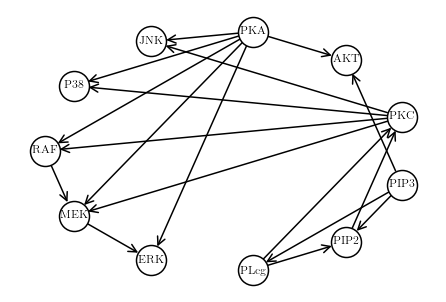

In [46]:
sempler.utils.plot_graph(sachs.DAGs['consensus'], labels=sachs.node_names)